In [1]:
#The College data set in the ISLR library will be used as the data source. 
library(ISLR)

In [2]:
#Sneak Peak into the data
print(head(College))

                             Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University     Yes 1660   1232    721        23        52
Adelphi University               Yes 2186   1924    512        16        29
Adrian College                   Yes 1428   1097    336        22        50
Agnes Scott College              Yes  417    349    137        60        89
Alaska Pacific University        Yes  193    146     55        16        44
Albertson College                Yes  587    479    158        38        62
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University        2885         537     7440       3300   450
Adelphi University                  2683        1227    12280       6450   750
Adrian College                      1036          99    11250       3750   400
Agnes Scott College                  510          63    12960       5450   450
Alaska Pacific University            249         869     7560       4120 

In [3]:
print(str(College))

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [4]:
print(summary(College))

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

There are 777 observations and 18 columns in the data set. It is our aim to build a model which predicts if a college is private or not based on the charecterstics of this data set. 

## Exploratory Data Analysis

In [5]:
sum(is.na(College))

[1] 0

Good! We don't have any missing data in our data set.

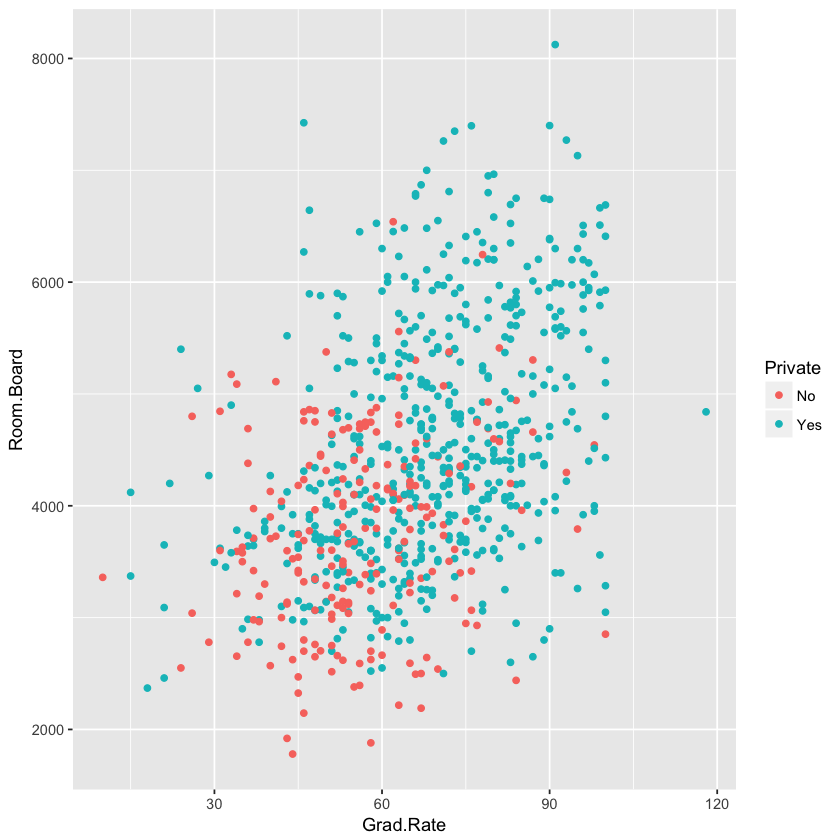

In [6]:
library(ggplot2)
p1 <- ggplot(College, aes(Grad.Rate, Room.Board)) + geom_point(aes(color = Private))
print(p1)

The above plot shows the comparision of grduation rate with room and boarding fees. The hue indicates if the colleges are private or not. 


It is clear that the room and boarding fees for private colleges are significantly more. It is also observed that many private colleges have a higher graduation rate as compared to non-private ones. 

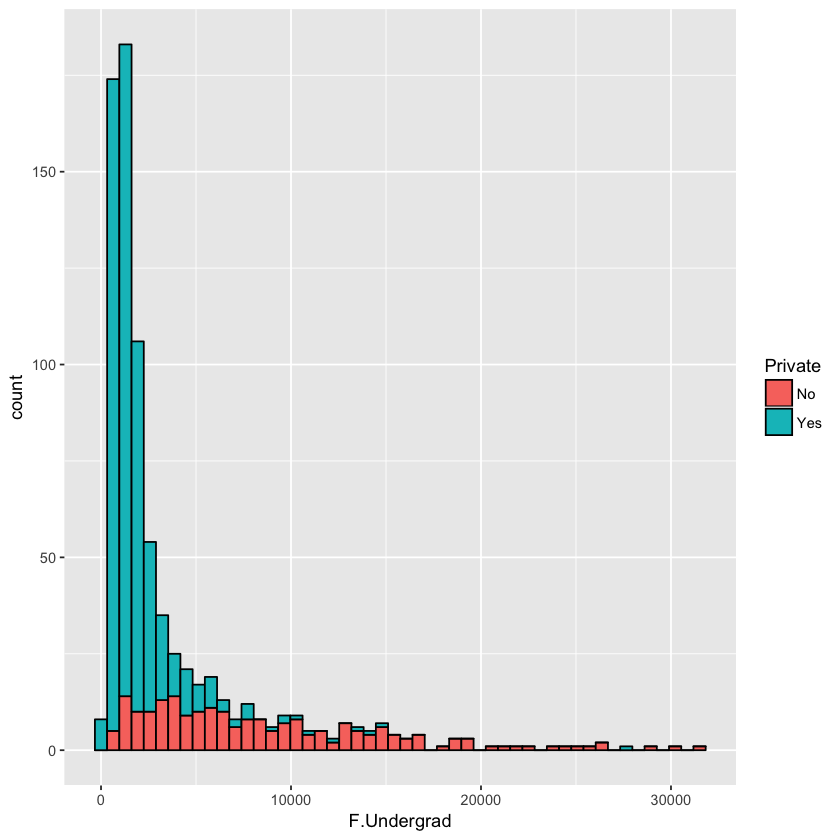

In [26]:
p2 <- ggplot(College, aes(F.Undergrad)) + geom_histogram(aes(fill = Private), color = 'black', bins = 50, position = position_stack(vjust = 0, reverse = T))
print(p2)

The above histogram shows that the number of full time undergrads enrolled are less in private colleges in comparision.

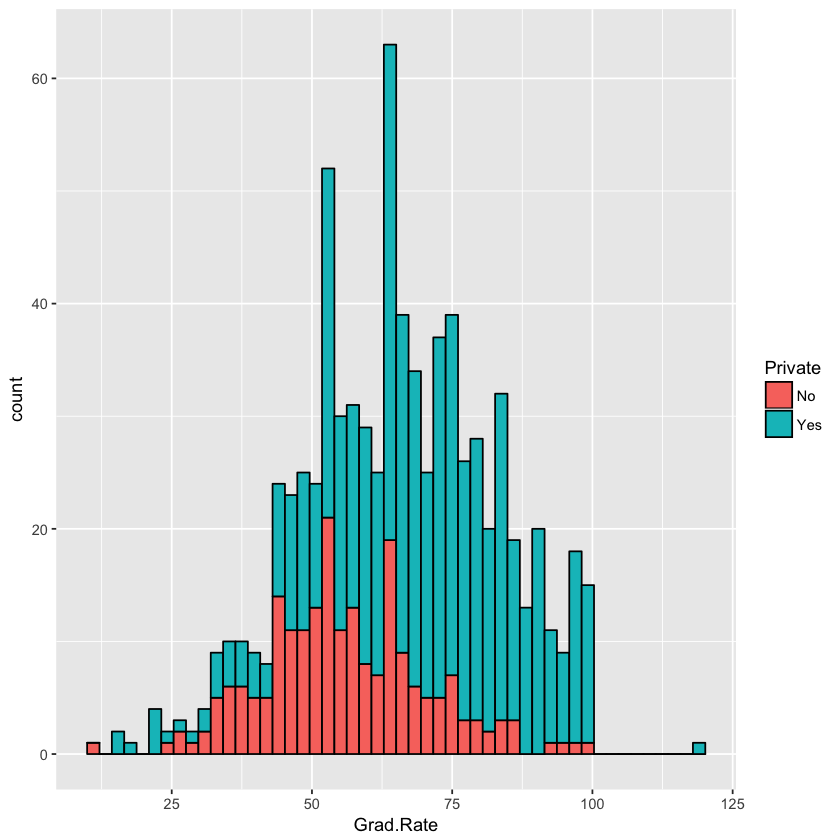

In [25]:
p3 <- ggplot(College, aes(Grad.Rate)) + geom_histogram(aes(fill = Private), color = 'black', bins = 50, position = position_stack(vjust = 0, reverse = T))    
print(p3)

Outlier spotted! One of the colleges seems to have more than 100% graduation rate. Let's fix that in the next cell.

In [27]:
College[College$Grad.Rate > 100,]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [28]:
College[College$Grad.Rate > 100,18] <- 100

In [29]:
#splitting the data into test and train sets
library(caTools)

split <- sample.split(College$Private, SplitRatio = 0.7)
train <- subset(College, split == T)
test <-subset(College, split == F)

In [30]:
#building a classification tree
library(rpart)
tree.model <- rpart(Private ~ ., data = train)
predictions <- predict(tree.model, test)
print(head(predictions))

                                     No       Yes
Abilene Christian University 0.44444444 0.5555556
Adrian College               0.00621118 0.9937888
Alderson-Broaddus College    0.00621118 0.9937888
Allegheny College            0.00621118 0.9937888
Alverno College              0.00621118 0.9937888
Anderson University          0.00621118 0.9937888


In [31]:
#Merging the probabilitites into one column and classifying using Yes or No. Cutoff = 0.5 
predictions <- as.data.frame(predictions)
predictions$Private <- ifelse(predictions$Yes > 0.5, 'YES', 'NO')
predictions$No <- NULL
predictions$Yes <- NULL

In [32]:
#clasifications matrix
table(test$Private, predictions$Private)

     
       NO YES
  No   49  15
  Yes  11 158

In [33]:
sensitivity <- (153/(153+16))
accuracy <- (153 + 57)/ 233
print('Sensitivity is'); sensitivity*100

print('Accuracy is'); accuracy*100

[1] "Sensitivity is"


[1] 90.53254

[1] "Accuracy is"


[1] 90.12876

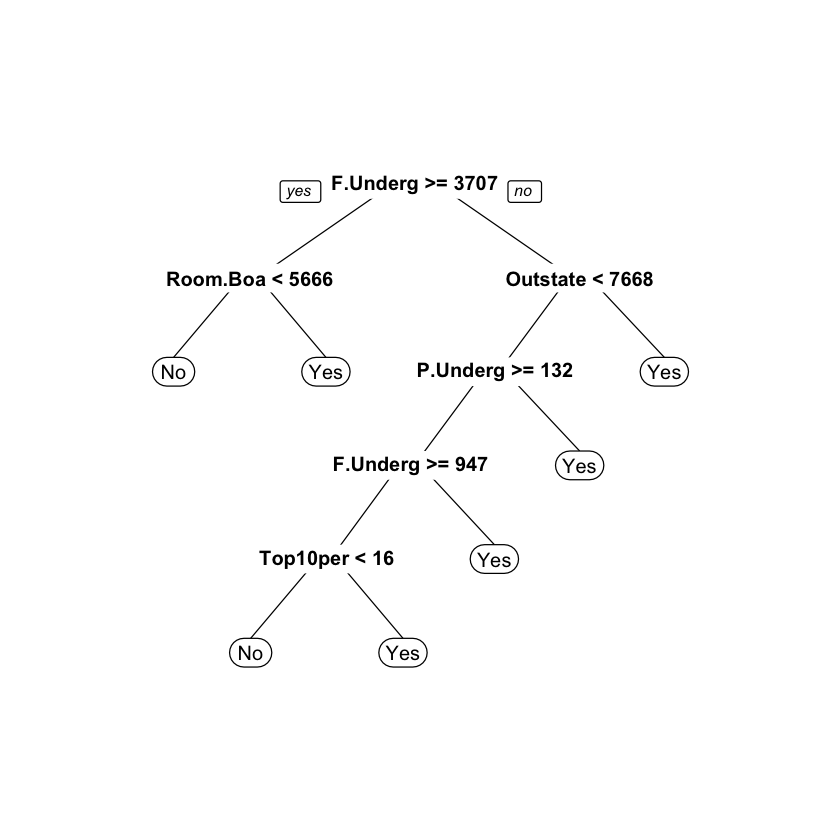

In [34]:
library(rpart.plot)
prp(tree.model)

In [35]:
########Random Forest###########

library(randomForest)
rf.model <- randomForest(Private ~. , data = train, importance = TRUE)
print(rf.model)
predictions.rf <- predict(rf.model, test)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin




Call:
 randomForest(formula = Private ~ ., data = train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 6.07%
Confusion matrix:
     No Yes class.error
No  128  20  0.13513514
Yes  13 383  0.03282828


In [36]:
#classification matrix
table(test$Private, predictions.rf)

     predictions.rf
       No Yes
  No   51  13
  Yes   4 165

In [37]:
Sensitivity <- 164/(164+5)
Sensitivity*100

[1] 97.04142

In [38]:
Accuracy <- (164+57)/(233)
Accuracy*100

[1] 94.84979

Hence, we have a model, which has an accuracy of 94.85% when predicting if a college is private or not using the above charecterstics. 
